
Loaded unified dataframe: (576, 7)


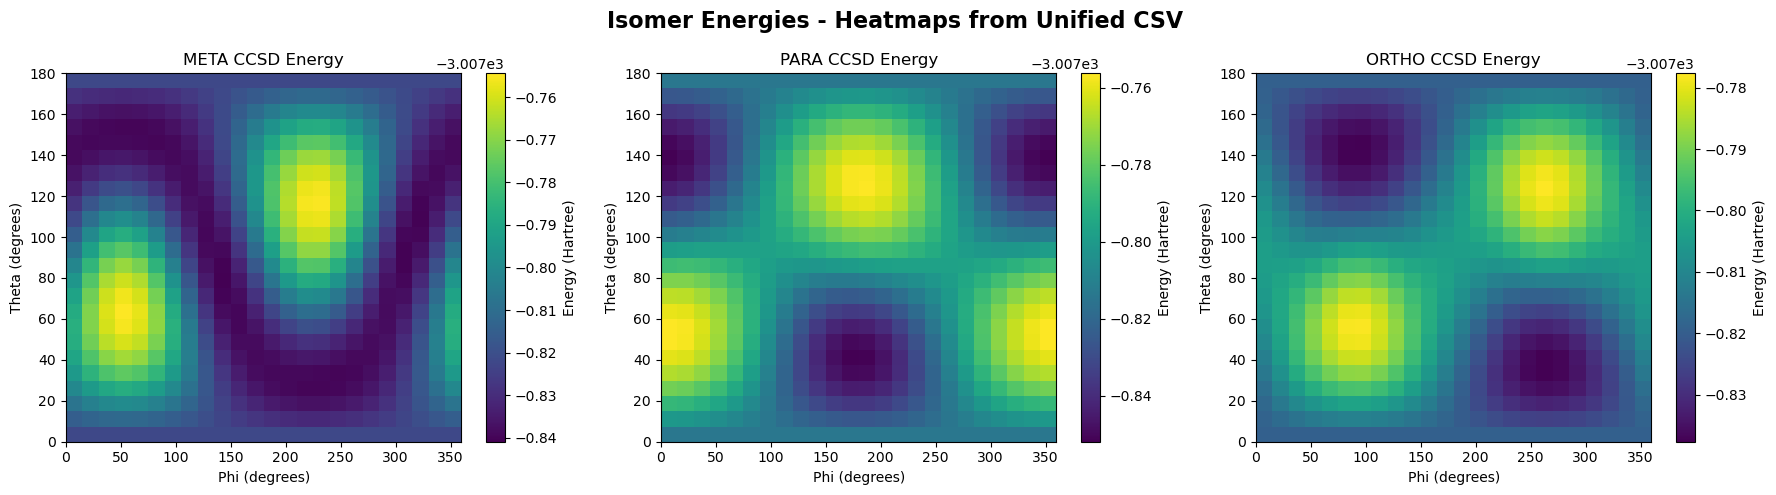

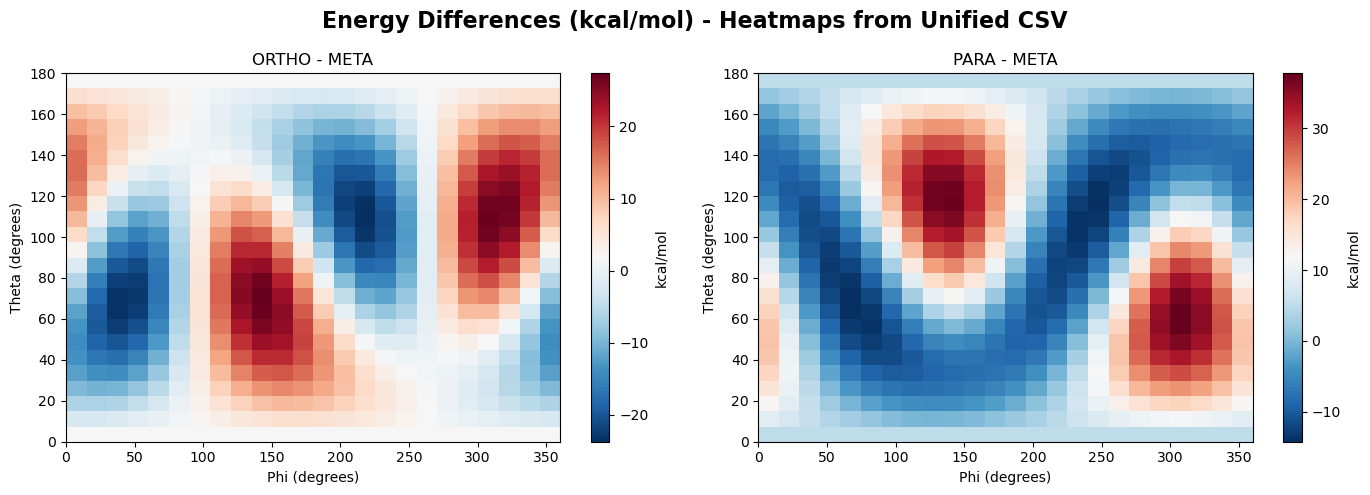


✓ Heatmaps created from unified CSV file!

ALL PROCESSING COMPLETE!


In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the CSV file
unified_read = pd.read_csv('unified_isomer_energies.csv')
print(f"\nLoaded unified dataframe: {unified_read.shape}")

# Create pivot tables for heatmaps
meta_pivot = unified_read.pivot(index='theta', columns='phi', values='meta_energy')
para_pivot = unified_read.pivot(index='theta', columns='phi', values='para_energy')
ortho_pivot = unified_read.pivot(index='theta', columns='phi', values='ortho_energy')

# Create heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Isomer Energies - Heatmaps from Unified CSV', fontsize=16, fontweight='bold')

# META heatmap
im1 = axes[0].imshow(meta_pivot.values, aspect='auto', cmap='viridis', origin='lower',
                     extent=[meta_pivot.columns.min(), meta_pivot.columns.max(),
                            meta_pivot.index.min(), meta_pivot.index.max()])
axes[0].set_xlabel('Phi (degrees)')
axes[0].set_ylabel('Theta (degrees)')
axes[0].set_title('META CCSD Energy')
plt.colorbar(im1, ax=axes[0], label='Energy (Hartree)')

# PARA heatmap
im2 = axes[1].imshow(para_pivot.values, aspect='auto', cmap='viridis', origin='lower',
                     extent=[para_pivot.columns.min(), para_pivot.columns.max(),
                            para_pivot.index.min(), para_pivot.index.max()])
axes[1].set_xlabel('Phi (degrees)')
axes[1].set_ylabel('Theta (degrees)')
axes[1].set_title('PARA CCSD Energy')
plt.colorbar(im2, ax=axes[1], label='Energy (Hartree)')

# ORTHO heatmap
im3 = axes[2].imshow(ortho_pivot.values, aspect='auto', cmap='viridis', origin='lower',
                     extent=[ortho_pivot.columns.min(), ortho_pivot.columns.max(),
                            ortho_pivot.index.min(), ortho_pivot.index.max()])
axes[2].set_xlabel('Phi (degrees)')
axes[2].set_ylabel('Theta (degrees)')
axes[2].set_title('ORTHO CCSD Energy')
plt.colorbar(im3, ax=axes[2], label='Energy (Hartree)')

plt.tight_layout()
plt.show()

# Also create heatmaps for the energy differences
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Energy Differences (kcal/mol) - Heatmaps from Unified CSV', fontsize=16, fontweight='bold')

ortho_meta_pivot = unified_read.pivot(index='theta', columns='phi', values='ortho_minus_meta_kcalmol')
para_meta_pivot = unified_read.pivot(index='theta', columns='phi', values='para_minus_meta_kcalmol')

# ORTHO - META
im1 = axes[0].imshow(ortho_meta_pivot.values, aspect='auto', cmap='RdBu_r', origin='lower',
                     extent=[ortho_meta_pivot.columns.min(), ortho_meta_pivot.columns.max(),
                            ortho_meta_pivot.index.min(), ortho_meta_pivot.index.max()])
axes[0].set_xlabel('Phi (degrees)')
axes[0].set_ylabel('Theta (degrees)')
axes[0].set_title('ORTHO - META')
plt.colorbar(im1, ax=axes[0], label='kcal/mol')

# PARA - META
im2 = axes[1].imshow(para_meta_pivot.values, aspect='auto', cmap='RdBu_r', origin='lower',
                     extent=[para_meta_pivot.columns.min(), para_meta_pivot.columns.max(),
                            para_meta_pivot.index.min(), para_meta_pivot.index.max()])
axes[1].set_xlabel('Phi (degrees)')
axes[1].set_ylabel('Theta (degrees)')
axes[1].set_title('PARA - META')
plt.colorbar(im2, ax=axes[1], label='kcal/mol')

plt.tight_layout()
plt.show()

print("\n✓ Heatmaps created from unified CSV file!")
print("\n" + "="*60)
print("ALL PROCESSING COMPLETE!")
print("="*60)

In [3]:
# In case you want to store this data in numpy arrays!
meta_grid = meta_pivot.to_numpy()
para_grid = para_pivot.to_numpy()
ortho_grid = ortho_pivot.to_numpy()

print(f"\nMethod 3: Pivot tables as 2D grids")
print(f"  meta_grid:  shape={meta_grid.shape}")
print(f"  para_grid:  shape={para_grid.shape}")
print(f"  ortho_grid: shape={ortho_grid.shape}")
print(f"  Grid format: rows=theta values, columns=phi values")

# Get the theta and phi values that correspond to the grid
theta_grid_vals = meta_pivot.index.to_numpy()
phi_grid_vals = meta_pivot.columns.to_numpy()
print(f"  theta_grid_vals: shape={theta_grid_vals.shape}, range=[{theta_grid_vals.min():.2f}, {theta_grid_vals.max():.2f}]")
print(f"  phi_grid_vals:   shape={phi_grid_vals.shape}, range=[{phi_grid_vals.min():.2f}, {phi_grid_vals.max():.2f}]")



Method 3: Pivot tables as 2D grids
  meta_grid:  shape=(24, 24)
  para_grid:  shape=(24, 24)
  ortho_grid: shape=(24, 24)
  Grid format: rows=theta values, columns=phi values
  theta_grid_vals: shape=(24,), range=[0.00, 180.00]
  phi_grid_vals:   shape=(24,), range=[0.00, 360.00]


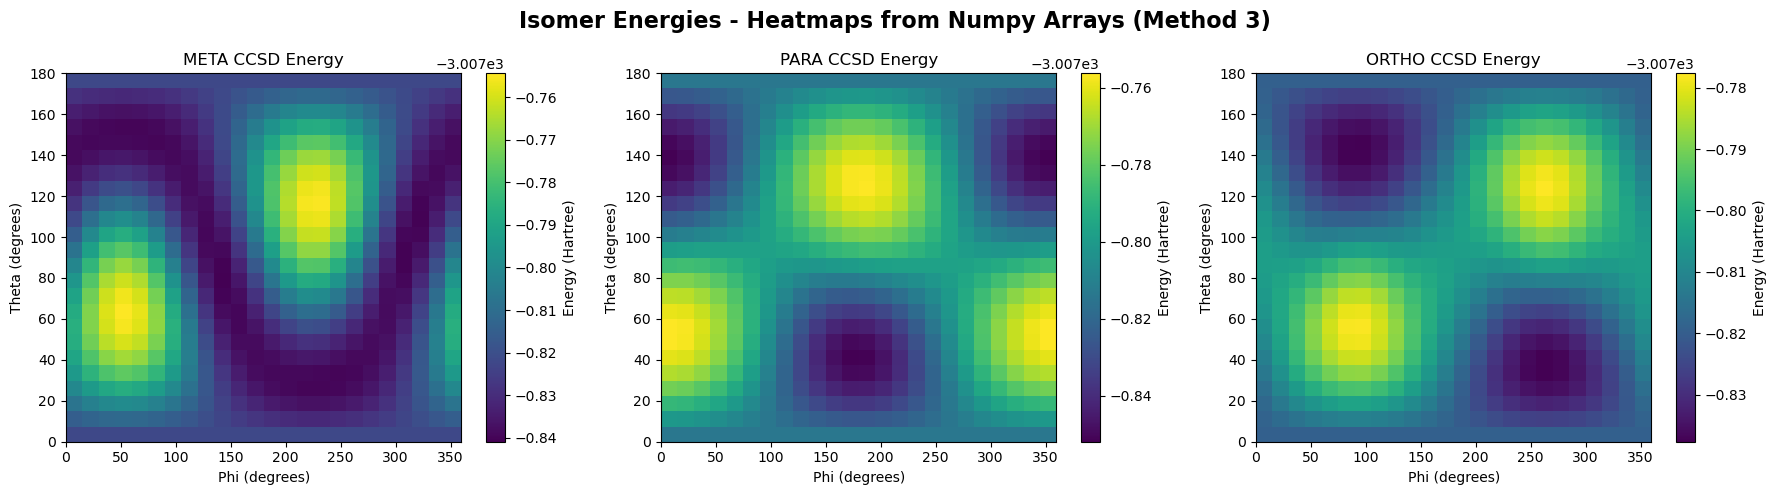

In [4]:
# Create heatmaps using numpy arrays
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Isomer Energies - Heatmaps from Numpy Arrays (Method 3)', fontsize=16, fontweight='bold')

# META heatmap from numpy array
im1 = axes[0].imshow(meta_grid, aspect='auto', cmap='viridis', origin='lower',
                     extent=[phi_grid_vals.min(), phi_grid_vals.max(),
                            theta_grid_vals.min(), theta_grid_vals.max()])
axes[0].set_xlabel('Phi (degrees)')
axes[0].set_ylabel('Theta (degrees)')
axes[0].set_title('META CCSD Energy')
plt.colorbar(im1, ax=axes[0], label='Energy (Hartree)')

# PARA heatmap from numpy array
im2 = axes[1].imshow(para_grid, aspect='auto', cmap='viridis', origin='lower',
                     extent=[phi_grid_vals.min(), phi_grid_vals.max(),
                            theta_grid_vals.min(), theta_grid_vals.max()])
axes[1].set_xlabel('Phi (degrees)')
axes[1].set_ylabel('Theta (degrees)')
axes[1].set_title('PARA CCSD Energy')
plt.colorbar(im2, ax=axes[1], label='Energy (Hartree)')

# ORTHO heatmap from numpy array
im3 = axes[2].imshow(ortho_grid, aspect='auto', cmap='viridis', origin='lower',
                     extent=[phi_grid_vals.min(), phi_grid_vals.max(),
                            theta_grid_vals.min(), theta_grid_vals.max()])
axes[2].set_xlabel('Phi (degrees)')
axes[2].set_ylabel('Theta (degrees)')
axes[2].set_title('ORTHO CCSD Energy')
plt.colorbar(im3, ax=axes[2], label='Energy (Hartree)')

plt.tight_layout()
plt.show()
